# STAT1000J Project：CSGO Pro Player Performance Analysis
**Name: Hao Liang   ID: 520370910094**

I am a passionate fan of CS:GO. Counter-Strike is a popular FPS game in the esports world since its release. It offers players an unparalleled experience of tension, excitement, and passion.

In this project, I first collected some data on professional players from [HLTV](https://www.hltv.org/stats/players?startDate=all&rankingFilter=All) (a website dedicated to keeping track of professional players and publishing news),  then completed data visualization and conducted a hypothesis test.

There are three dataset in total:
- The overall stats of professionals of all time
- The Terrorist-side stats of professionals of all time
- The Counter-Terrorist-side stats of professionals of all time

As part of my data analytics project, I've extracted data from three unique HLTV websites. To prepare for any potential changes to these sites, I've thought ahead and downloaded the  `html`  files for each one. This ensures that I can always access this valuable data for future analysis, no matter what happens to the live website.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from main import *

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## First step: Crawl data from HLTV

I downloaded the three websites as html file for convienience.

I have completed the function `get_dataset(file)` in `main.py`.

`get_dataset(file)` takes an HTML file as an argument, parses it using BeautifulSoup and then extracts and cleans the relevant data from the file before returning a pandas DataFrame object.

The DataFrame it returns should look like this:

|      | Player | Nationality    | Teams         | Maps | Rounds | K-D Diff | K/D  | Rating 2.0 |
| :--- | :----- | :------------- | :------------ | :--- | :----- | :------- | :--- | :--------- |
| 0    | ZywOo  | France         | Vitality      | 1118 | 29482  | +6876    | 1.38 | 1.27       |
| 1    | s1mple | Ukraine        | Natus Vincere | 1666 | 44101  | +9478    | 1.34 | 1.24       |
| 2    | sh1ro  | Russia         | Cloud9        | 979  | 26066  | +6329    | 1.46 | 1.23       |
| 3    | deko   | Russia         | 1WIN          | 545  | 14803  | +3090    | 1.36 | 1.20       |
| 4    | kaze   | Malaysia       | Rare Atom     | 948  | 24748  | +4485    | 1.31 | 1.18       |
| 5    | smooya | United Kingdom | BIG           | 924  | 24496  | +4043    | 1.27 | 1.18       |

Here are the definition of each columns:

| Column      | Description                                          |
| ----------- | ---------------------------------------------------- |
| Player      | The name of the player                               |
| Nationality | The nationality of the player                        |
| Teams       | The team(s) the player has played for                |
| Maps        | The number of maps the player has played             |
| Rounds      | The number of rounds the player has played           |
| K-D Diff    | The difference between the player's kills and deaths |
| K/D         | The player's kill/death ratio                        |
| Rating 2.0  | The player's rating based on their performance       |

In [4]:
# get_dataset(file) is defined in main.py
CT_df = get_dataset('CS_GO Player CT statistics database _ HLTV.org.html')
T_df = get_dataset('CS_GO Player T statistics database _ HLTV.org.html')
overall_df = get_dataset('CS_GO Player statistics database _ HLTV.org.html')
overall_df

,Player,Nationality,Teams,Maps,Rounds,K-D Diff,K/D,Rating 2.0
0,ZywOo,France,Vitality,1118,29482,+6876,1.38,1.27
1,s1mple,Ukraine,Natus Vincere,1666,44101,+9478,1.34,1.24
2,sh1ro,Russia,Cloud9,979,26066,+6329,1.46,1.23
3,deko,Russia,1WIN,545,14803,+3090,1.36,1.20
4,kaze,Malaysia,Rare Atom,948,24748,+4485,1.31,1.18
...,...,...,...,...,...,...,...,...
726,djL,Sweden,Chaos,688,18180,-1735,0.86,0.86
727,gob b,Germany,BIG,978,25799,-2828,0.84,0.85
728,PASHANOJ,Russia,Unique,620,16227,-2371,0.80,0.83
729,B1ad3,Ukraine,FlipSid3,899,23232,-3408,0.80,0.83


The following cell is useed to ensure the professionals are the same in three DataFrames

In [5]:
(overall_df['Player'].sort_values().reset_index() == CT_df['Player'].sort_values().reset_index())['Player'].sum() == overall_df.shape[0], (overall_df['Player'].sort_values().reset_index() == T_df['Player'].sort_values().reset_index())['Player'].sum() == overall_df.shape[0]

(True, True)

## Some interesting exploration
Which countries do the world's players come from?


In [6]:
# The top 10 countries with the most CS:GO professional players.
country = overall_df.groupby('Nationality')['Player'].count().rename("Count").sort_values(ascending=False)
country.head(10)

Nationality
Denmark          71
United States    68
Russia           60
Brazil           60
Poland           49
Sweden           46
Australia        32
France           27
Ukraine          24
Bulgaria         24
Name: Count, dtype: int64

From the output of last cell we can see that Cis countries and European countries have the highest number of Top 50 professionals. Only 21 professionals come from China.

Let's take a look at how pro players from different countries perform.

In [7]:
# The top 10 countries with the highest average rating
overall_df\
        .groupby('Nationality')['Rating 2.0'].mean()\
        .sort_values(ascending=False)\
        .head(10)

Nationality
Malaysia                  1.180000
Hong Kong                 1.120000
Indonesia                 1.115000
Bosnia and Herzegovina    1.100000
Singapore                 1.083333
New Zealand               1.072857
Uruguay                   1.070000
Israel                    1.066667
Guatemala                 1.060000
Korea                     1.056667
Name: Rating 2.0, dtype: float64

It seems that professionals from Asia perform well as their average ratings are far ahead of other country. However, teams from Asia performs poor in Pro Leagues. This is really a tough problem.

The following cell compute the standard deviation of `Rating 2.0` of professionals from different countries.

In [8]:
overall_df\
    .groupby('Nationality')['Rating 2.0']\
    .apply(np.std).sort_values(ascending=False)\
    .head(10)

Nationality
Ukraine           0.092142
United Kingdom    0.083600
Turkey            0.079282
France            0.075628
Russia            0.074768
Germany           0.071455
Denmark           0.067550
New Zealand       0.066486
Bulgaria          0.064806
Mongolia          0.064374
Name: Rating 2.0, dtype: float64

Suprisingly, most of the countries with high std are Cis countries and European countries, which are places Top teams from.

From my perspective, there are several reasons:
- Most Top players come from these countries and their ratings are super high, which increase the std.
- The Pro Leagues in European and Cis are very competitive. European and Cis professionals may get lower ratings than others from Asia and America, even though they are in the same level.

## Further Exploration

In CS:GO, the T(Terrorist) side is the attacking team and the CT(Counter-Terrorist) side is the defending team. In a match, there are 15 rounds in each half, and after the first half, the teams switch sides. It is often more difficult for the T side to win rounds than the CT side because the CT side has the advantage of holding boom sites (A and B), which can create a difference in the statistics between the two sides. I want to find out how big the difference is.

I first merge the three dataframe together to get the `overall_df`, which contains all status of both sides

In [9]:
CT_df = CT_df.rename({'Rounds': 'CT_rounds', 'K-D Diff': "CT_K-D Diff", 'K/D': 'CT_K/D', 'Rating 2.0': 'CT_Rating 2.0'}, axis=1)
T_df = T_df.drop(['Nationality', 'Teams', 'Maps'], axis=1).rename({'Rounds': 'T_rounds', 'K-D Diff': "T_K-D Diff", 'K/D': 'T_K/D', 'Rating 2.0': 'T_Rating 2.0'}, axis=1)
overall_df = overall_df.drop(['Nationality', 'Teams', 'Maps'], axis=1).rename({'Rounds': 'overall_rounds', 'K-D Diff': "overall_K-D Diff", 'K/D': 'overall_K/D', 'Rating 2.0': 'overall_Rating 2.0'}, axis=1)

In [10]:
df = CT_df.merge(right=T_df, left_on='Player', right_on='Player')
df = df.merge(right=overall_df, left_on='Player', right_on='Player')
df.sort_values(by='overall_Rating 2.0', ascending=False)

,Player,Nationality,Teams,Maps,CT_rounds,CT_K-D Diff,CT_K/D,CT_Rating 2.0,T_rounds,T_K-D Diff,T_K/D,T_Rating 2.0,overall_rounds,overall_K-D Diff,overall_K/D,overall_Rating 2.0
0,ZywOo,France,Vitality,1118,14817,+5078,1.61,1.39,14665,+1798,1.19,1.16,29482,+6876,1.38,1.27
2,s1mple,Ukraine,Natus Vincere,1666,22105,+6523,1.49,1.33,21996,+2955,1.20,1.17,44101,+9478,1.34,1.24
1,sh1ro,Russia,Cloud9,979,12877,+4352,1.69,1.33,13189,+1977,1.26,1.13,26066,+6329,1.46,1.23
3,deko,Russia,1WIN,545,7489,+2407,1.60,1.32,7314,+683,1.15,1.10,14803,+3090,1.36,1.20
7,saffee,Brazil,FURIA,471,6257,+1694,1.48,1.29,6235,+430,1.11,1.07,12492,+2124,1.28,1.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
738,djL,Sweden,Chaos,688,9396,-158,0.97,0.93,8784,-1577,0.75,0.79,18180,-1735,0.86,0.86
736,gob b,Germany,BIG,978,13043,-216,0.97,0.94,12756,-2612,0.72,0.76,25799,-2828,0.84,0.85
740,B1ad3,Ukraine,FlipSid3,899,11375,-719,0.91,0.92,11857,-2689,0.70,0.74,23232,-3408,0.80,0.83
742,PASHANOJ,Russia,Unique,620,8039,-707,0.87,0.88,8188,-1664,0.73,0.79,16227,-2371,0.80,0.83


In [11]:
df.columns

Index(['Player', 'Nationality', 'Teams', 'Maps', 'CT_rounds', 'CT_K-D Diff',
       'CT_K/D', 'CT_Rating 2.0', 'T_rounds', 'T_K-D Diff', 'T_K/D',
       'T_Rating 2.0', 'overall_rounds', 'overall_K-D Diff', 'overall_K/D',
       'overall_Rating 2.0'],
      dtype='object')

### Visualization

In order to have a clearer understanding of the differences between the two sides, I use histograms to visualize my data.

The first three plots are `Overall Rating 2.0`, `CT Rating 2.0` and `T Rating 2.0`

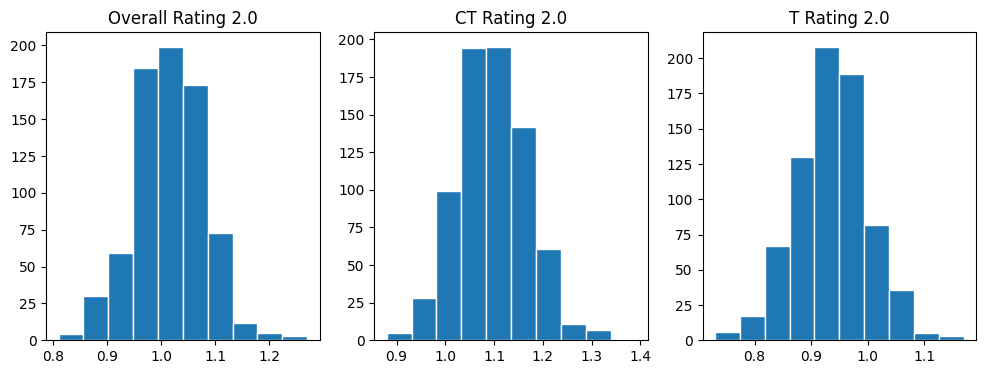

In [12]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

axs[0].hist(df[['overall_Rating 2.0']], ec='w')
axs[0].set_title('Overall Rating 2.0')

axs[1].hist(df[['CT_Rating 2.0']], ec='w')
axs[1].set_title('CT Rating 2.0')

axs[2].hist(df[['T_Rating 2.0']], ec='w')
axs[2].set_title('T Rating 2.0')

plt.show()

<Axes: ylabel='Frequency'>

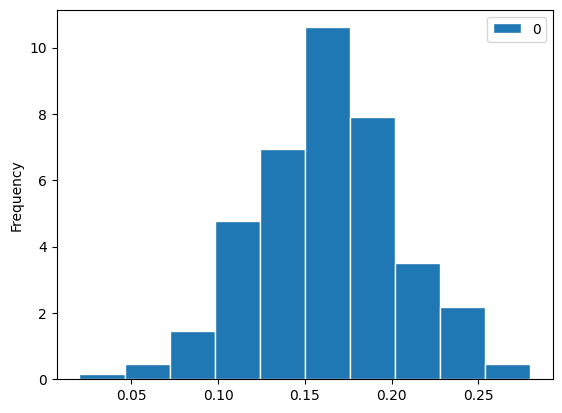

In [13]:
pd.DataFrame(df['CT_Rating 2.0'] - df['T_Rating 2.0']).plot(kind='hist', ec='w', density=True)

In [14]:
pd.DataFrame(df['CT_Rating 2.0'] - df['T_Rating 2.0']).describe()

,0
count,743.000000
mean,0.162167
std,0.041182
min,0.020000
25%,0.140000
50%,0.160000
75%,0.190000
max,0.280000


## Hypothesis testing

- **My null hypothesis**: The average `T_Rating 2.0` is no more than 0.16 below the average `CT_Rating 2.0`.

- **The alternative hypothesis**: The average `T_Rating 2.0` is significantly lower that the average `CT_Rating 2.0` by more than 0.16.

I set the significance level to be 0.05
Now, I write a simulation that runs 100 times and keeps track of the mean of difference between the average `T_Rating 2.0` and the average `CT_Rating 2.0`. During each simulation, I will sample 300 professionals from `df` randomly by using the function `sample_300(df)` function defined in `main.py`.

Then run the simulation 1000 tims.

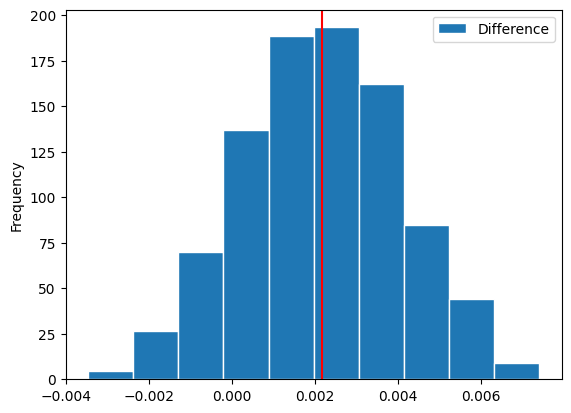

In [15]:
# Calculate the difference between CT_Rating 2.0 and T_Rating 2.0 for each sample in df
n_reputation = 1000
rating_differences = []
statistic = (df['CT_Rating 2.0'] - df['T_Rating 2.0']).mean() - 0.16
 # Iterate through n_reputation samples
for i in range(n_reputation):
    # Sample 300 rows from df
    sample = sample_300(df)
    # Calculate the mean difference between CT_Rating 2.0 and T_Rating 2.0
    difference = (sample['CT_Rating 2.0'] - sample['T_Rating 2.0']).mean() - 0.16
    # Append the difference to the list
    rating_differences.append(difference)
 # Plot the differences in a histogram
pd.DataFrame().assign(Difference = rating_differences).plot(kind='hist', density=True, ec='w');
plt.axvline(statistic, color='red');

Now, calculate the p-value as the proportion of simulation results that are at least as extreme as the observed test statistic (i.e., have a greater value).

- If `p-value` is greater than the significance level, I accept the null hypothesis.
- If the `p-value` is smaller than the significance level, I can reject the null hypothesis and conclude that the average `T_Rating 2.0` is significantly lower than the average `CT_Rating 2.0` by more than 0.16.

In [16]:
# Calculate the p-value based on the simulation results
p_value = sum(np.array(rating_differences) >= statistic) / n_reputation
 # Determine if the null hypothesis is accepted or rejected based on the calculated p-value
if p_value > 0.05:
    print("p-value is", p_value, "and is greater than the significance level.")
    print("Therefore, we accept the null hypothesis.")
else:
    print("p-value is", p_value, "and is less than or equal to the significance level.")
    print("Therefore, we reject the null hypothesis and conclude that the average T_Rating 2.0 is significantly lower than the average CT_Rating 2.0 by more than 0.16.")

p-value is 0.496 and is greater than the significance level.
Therefore, we accept the null hypothesis.


### Conclusion of the test

Since `p-value` is greater than the significance, we reject the null hypothesis and accept the alternative hypothesis.

So that we can conclude that teams should pay more attention to their offensive tactics in order to get more points on T side, which will definitely increase their winning rate.

## Build a predictive model

`Rating` is a comprehensive indicator that showcases a player's performance in the game. The higher the `rating`, the better the player's performance. There are many factors that affect the `rating`, such as Average Damage per Round (ADR), Kill/Death Ratio, Assists, etc. How are the weights of these factors allocated? Can we predict `rating` based on this data? To answer these two questions, I build a predictive model.

Now we are importing data from `csgo_player_stats.csv`, which contains comprehensive and diverse data. Below is an overview of each column in this CSV file:

| Column Name                | Description                                                                                                                                                                            |
|----------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Name                       | The name of the player.                                                                                                                                                                |
| Total Kills                | The total number of kills made by the player in the game.                                                                                                                              |
| Headshot Percentage        | The percentage of kills made by the player that were headshots.                                                                                                                        |
| Total Deaths               | The total number of deaths the player has had in the game.                                                                                                                             |
| Kill/Death Ratio           | The ratio of kills to deaths for the player.                                                                                                                                           |
| Damage Per Round           | The average amount of damage dealt by the player per round.                                                                                                                            |
| Grenade Damage Per Round   | The average amount of damage dealt by the player with grenades per round.                                                                                                              |
| Maps Played                | The total number of maps the player has played.                                                                                                                                        |
| Rounds Played              | The total number of rounds the player has played.                                                                                                                                      |
| Kills Per Round            | The average number of kills made by the player per round.                                                                                                                              |
| Assists Per Round          | The average number of assists made by the player per round.                                                                                                                            |
| Deaths Per Round           | The average number of deaths the player has had per round.                                                                                                                             |
| Saved By Teamates Per Round| The average number of times the player has been saved by a teammate per round.                                                                                                         |
| Saved Teamates Per Round   | The average number of times the player has saved a teammate per round.                                                                                                                 |
| KAST                       | The percentage of rounds in which the player either had a kill, assist, survived or was traded.                                                                                        |
| Impact                     | The average impact made by the player per round, which is a measure of how much the player's actions contribute to the team's success.                                                 |
| Rating 2.0                 | The player's rating, which is a measure of their overall performance in the game. This rating takes into account a variety of factors, including K/D ratio, Damage Per Round and KAST. |

### Load the data

I load the data from `csgo_player_stats.csv` and store in `tr` and `te` by using the `train_test_split` function from `sklearn.model_selection`.

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [18]:
pred_data = pd.read_csv('csgo_player_stats.csv')
pred_data['KAST'] = pred_data['KAST'] / 100
tr, te = train_test_split(pred_data, test_size=0.1, random_state=64)

In [19]:
tr

,Name,Total Kills,Headshot Percentage,Total Deaths,Kill/Death Ratio,Damage Per Round,Grenade Damage Per Round,Maps Played,Rounds Played,Kills Per Round,Assists Per Round,Deaths Per Round,Saved By Teamates Per Round,Saved Teamates Per Round,KAST,Impact,Rating 2.0
167,Brollan,18465,52.5,16993,1.09,79.0,4.7,953,25344,0.73,0.13,0.67,0.09,0.10,0.706,1.17,1.12
564,Sergiz,7819,52.1,7733,1.01,72.7,5.1,456,12110,0.65,0.13,0.64,0.08,0.09,0.703,0.94,1.03
159,WorldEdit,25226,28.0,22750,1.11,75.0,2.6,1328,34716,0.73,0.12,0.66,0.08,0.08,0.690,1.15,1.07
20,Jame,21580,25.2,16489,1.31,73.4,3.9,1131,29957,0.72,0.09,0.55,0.07,0.09,0.738,1.13,1.18
75,nawwk,15664,35.7,13321,1.18,73.5,2.8,799,21330,0.73,0.10,0.62,0.09,0.11,0.716,1.09,1.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,floppy,14755,49.4,13126,1.12,81.5,3.1,755,19833,0.74,0.14,0.66,0.11,0.14,0.733,1.14,1.15
54,f0rest,40395,51.7,34695,1.16,76.5,3.7,2056,53433,0.76,0.12,0.65,0.09,0.10,0.706,1.07,1.11
166,FalleN,27203,30.8,23674,1.15,71.8,3.5,1499,39201,0.69,0.11,0.60,0.08,0.08,0.718,1.08,1.07
119,keev,11408,29.1,10191,1.12,73.6,2.8,594,15524,0.73,0.09,0.66,0.08,0.08,0.680,1.21,1.08


In [20]:
te

,Name,Total Kills,Headshot Percentage,Total Deaths,Kill/Death Ratio,Damage Per Round,Grenade Damage Per Round,Maps Played,Rounds Played,Kills Per Round,Assists Per Round,Deaths Per Round,Saved By Teamates Per Round,Saved Teamates Per Round,KAST,Impact,Rating 2.0
303,FrostMisty,6710,41.8,6299,1.07,79.0,2.8,376,9498,0.71,0.14,0.66,0.09,0.10,0.724,1.03,1.03
421,DESPE,8068,29.8,7748,1.04,68.7,2.5,468,12127,0.67,0.11,0.64,0.08,0.08,0.694,1.04,1.01
269,dEE,8169,33.5,7618,1.07,72.7,2.9,439,11583,0.71,0.10,0.66,0.09,0.10,0.699,1.07,1.07
471,DeathZz,7963,49.9,7826,1.02,75.1,3.3,446,11898,0.67,0.13,0.66,0.09,0.10,0.703,0.96,1.04
93,ryx,9797,36.3,8616,1.14,83.7,3.6,491,12856,0.76,0.16,0.67,0.09,0.12,0.727,1.11,1.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,MAIROLLS,8516,49.1,8729,0.98,73.2,3.5,495,12791,0.67,0.13,0.68,0.10,0.10,0.705,0.97,1.02
673,TOAO,18268,47.9,19236,0.95,69.6,4.7,1079,28771,0.63,0.12,0.67,0.09,0.08,0.684,0.97,0.99
678,Fifflaren,7894,37.5,7934,0.99,91.7,6.2,538,13220,0.60,0.15,0.60,0.04,0.16,0.720,1.13,0.94
334,Spongey,12738,50.8,11748,1.08,71.5,4.4,740,19173,0.66,0.12,0.61,0.10,0.12,0.727,0.94,1.06


According to my experience, `Kill/Death Ratio`, `Damage Per Round`(ADR) and `KAST` are the three most significant factors that can influence `Rating 2.0`. So I want to do a linear regression on these factors.

I use `LinearRegression` from `sklearn.linear_model` module to perform the linear regression.

`get_pre_columns` is the function defined in `main.py` that gets the pre-existing columns from the DataFrame and creates a Pipeline object with a `LinearRegression` model to predict the `Rating 2.0` column. The function then fits the model, creates the prediction and returns the model and the prediction.

### Regression Result

I use Root Mean Square Error (RMSE) to evaluate the regression model.

The function `rmse` is defined in `main.py` to compute the RMSE.

In [21]:
model, Y_hat_tr = get_pre_columns(tr)
Y_tr = tr['Rating 2.0']
print("Training Error (RMSE):", rmse(Y_tr, Y_hat_tr))

Training Error (RMSE): 0.02825464542281088


In [22]:
Y_hat_te = model.predict(te)
Y_te = te['Rating 2.0']
print("Testing Error (RMSE):", rmse(Y_te, Y_hat_te))

Testing Error (RMSE): 0.033604661204510944


In [23]:
model['LinearModel'].coef_, model['LinearModel'].intercept_

(array([0.57537783, 0.00421085, 0.19137497]), -0.012197289752643892)

As shown in the blow cells, the RMSE of both train data and the test data are very low, which means we actually perform a good regression model on these factors.

The regression model is as follow:

$$ \text{Rating 2.0} =  0.57537783 \times \text{K/D Ratio} + 0.00421085 \times \text{ADR} + 0.19137497 \times \text{KAST} - 0.012197289752643892$$

## End line